In [1]:
import numpy as np
import scipy as cp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets 
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [17]:
def write_answer(name,ans):
    with open('D:\Leon Projects\Python\Obuchenie na razmetkah\Week4\Task1\%s.txt' %name,'w') as func:
        func.write(str(ans))

In [3]:
digits = datasets.load_digits()

In [6]:
X,y = digits.data,digits.target

In [7]:
X.shape

(1797, 64)

In [12]:
# 1 Task
estimator = DecisionTreeClassifier()

In [14]:
score = cross_val_score(estimator, X, y, cv=10)

In [20]:
score

array([ 0.77297297,  0.86338798,  0.85082873,  0.80555556,  0.79329609,
        0.88826816,  0.89944134,  0.8258427 ,  0.84180791,  0.80681818])

In [16]:
score.mean()

0.83482196105964679

In [19]:
write_answer(1,score.mean())

In [26]:
# 2 Task
bagging_estimator = BaggingClassifier(base_estimator=estimator,n_estimators=100)

In [27]:
score2 = cross_val_score(bagging_estimator,X,y, cv=10)

In [28]:
score2

array([ 0.88648649,  0.95628415,  0.91160221,  0.93888889,  0.93296089,
        0.96648045,  0.95530726,  0.91573034,  0.85875706,  0.90909091])

In [29]:
score2.mean()

0.92315886499939981

In [30]:
write_answer(2,score2.mean())

In [31]:
# 3 Task
n_feat = X.shape[1]
print n_feat

64


In [35]:
bagging_estimator2 = BaggingClassifier(base_estimator=estimator,n_estimators=100, max_features=int(np.sqrt(n_feat)))

In [37]:
bagging_estimator2.max_features

8

In [36]:
score3 = cross_val_score(bagging_estimator2,X,y, cv=10)

In [38]:
score3

array([ 0.88648649,  0.96174863,  0.91160221,  0.90555556,  0.90502793,
        0.94413408,  0.96648045,  0.98876404,  0.89830508,  0.90909091])

In [39]:
score3.mean()

0.9277195382747625

In [40]:
write_answer(3,score3.mean())

In [41]:
# 4 Task
estimator2 = DecisionTreeClassifier(max_features=int(np.sqrt(n_feat)))

In [42]:
estimator2.max_features

8

In [43]:
bagging_estimator3 = BaggingClassifier(base_estimator=estimator2, n_estimators=100)

In [44]:
score4 = cross_val_score(bagging_estimator3, X, y, cv=10)

In [45]:
score4

array([ 0.8972973 ,  0.9726776 ,  0.93922652,  0.95555556,  0.96089385,
        0.98324022,  0.98882682,  0.97752809,  0.93220339,  0.94318182])

In [46]:
score4.mean()

0.95506311595730009

In [47]:
write_answer(4,score4.mean())

In [48]:
# 5 Task
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.grid_search import GridSearchCV

In [75]:
param_grid = [{'n_estimators': np.arange(5,105,5)},
              {'max_features': np.arange(5,n_feat,5),'n_estimators':[100]},
              {'max_depth':[5,6,None],'n_estimators':[100]

In [57]:
rand_forest = RandomForestClassifier(n_estimators=100)

In [76]:
grid_search = GridSearchCV(rand_forest,param_grid=param_grid,cv=10)

In [95]:
param_grid2 = [{'n_estimators': np.arange(5,105,5)},
               {'max_features': np.arange(5,n_feat,5)},
               {'max_depth':[5,6,None]}
              ]

In [96]:
grid_search2 = GridSearchCV(rand_forest,param_grid=param_grid2,cv=10)

In [77]:
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])}, {'max_features': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]), 'n_estimators': [100]}, {'n_estimators': [100], 'max_depth': [5, 6, None]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [97]:
grid_search2.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])}, {'max_features': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])}, {'max_depth': [5, 6, None]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

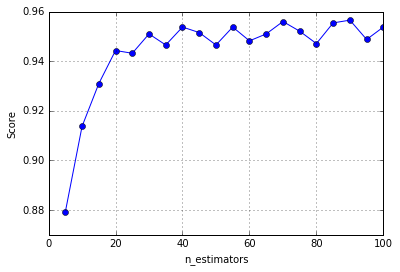

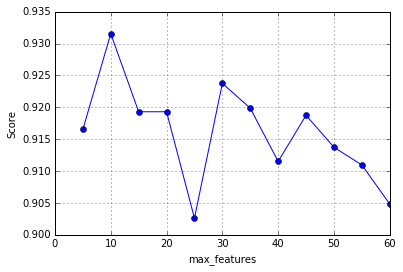

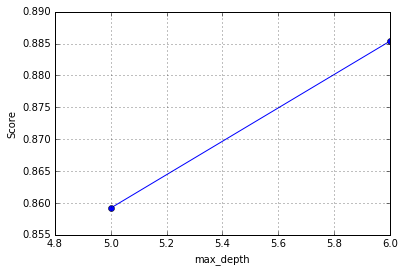

In [216]:
for params in param_grid2:
    param_name =  params.keys()[0]
    scores = [param[1] for param in grid_search2.grid_scores_ if param[0].keys()[0] == param_name]
    grids = params.values()
    for id,val in enumerate(grids[0]):
        if val == 'None':
            del(grids[0][id])
    plt.figure()
    plt.grid(True)
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.plot(grids[0],scores,marker='o')
    plt.show()

In [217]:
answer5 = '2 3 4 7'

In [218]:
write_answer(5,answer5)